## Data Convert

In [64]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# Code for spacy V3
from spacy.tokens import DocBin
import srsly
import spacy
import spacy
from spacy.training import offsets_to_biluo_tags

# pd.options.mode.chained_assignment = None
# pd.set_option("expand_frame_repr", False)
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)

## Data Cleaning:
- remove special characters 

In [2]:
df = pd.read_csv('offer_retailer.csv')
df.head()

OFFER            RETAILER  \
0     Spend $50 on a Full-Priced new Club Membership           SAMS CLUB   
1       Beyond Meat® Plant-Based products, spend $25                 NaN   
2           Good Humor Viennetta Frozen Vanilla Cake                 NaN   
3  Butterball, select varieties, spend $10 at Dil...  DILLONS FOOD STORE   
4  GATORADE® Fast Twitch®, 12-ounce 12 pack, at A...              AMAZON   

         BRAND  
0    SAMS CLUB  
1  BEYOND MEAT  
2   GOOD HUMOR  
3   BUTTERBALL  
4     GATORADE

check distribution of name length by token count

In [51]:
def token_distribution(df: pd.DataFrame, col: str):
    # get distribution of name length by token count
    df_tmp = df[[col]].dropna().drop_duplicates()
    df_tmp['TOKEN_LENGTH'] = df_tmp[col].str.split().apply(len)
    print(df_tmp.TOKEN_LENGTH.describe())
    
    # Plot histogram of token length distribution
    plt.hist(df_tmp['TOKEN_LENGTH'], bins=range(1, max(df_tmp['TOKEN_LENGTH'])+2), align='left')
    plt.xlabel('Token length')
    plt.ylabel('Frequency')
    plt.title('Distribution of token length')
    plt.show()

count    144.000000
mean       1.666667
std        0.892862
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: TOKEN_LENGTH, dtype: float64


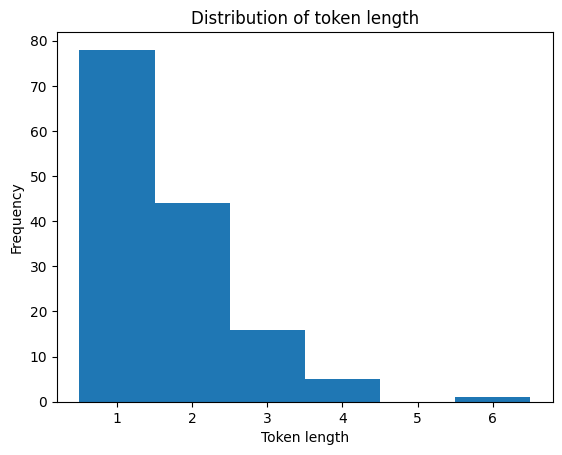

In [52]:
token_distribution(df, "BRAND")

count    61.000000
mean      1.836066
std       0.820169
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: TOKEN_LENGTH, dtype: float64


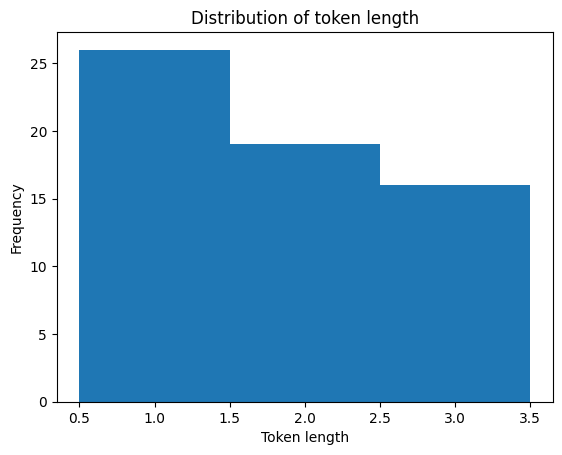

In [53]:
token_distribution(df, "RETAILER")

We see that most brand names are between 1 and 2 words and most retailer name are betwwen 1 and 3 words.

Now Check if brand/retailer names include special characters

In [57]:
import re
from typing import List

def check_special_chars(df: pd.DataFrame, col: str) -> List[str]:
    string_list = df[col].dropna().drop_duplicates().tolist()
    filtered_list = []
    for s in string_list:
        non_alnum_chars = re.findall(r'[^a-zA-Z0-9\s]', s)
        if non_alnum_chars:
            filtered_list.append(s)

    return filtered_list

In [58]:
check_special_chars(df, "BRAND")

['M&MS',
 "RAO'S",
 "MICHAEL ANGELO'S",
 'KODIAK CAKES FLAPJACK & WAFFLE MIX',
 "CAMERON'S COFFEE"]

In [59]:
check_special_chars(df, "RETAILER")

['H-E-B', 'GALLO.COM', 'SIOBEAUTY.COM', 'STOP & SHOP']

In [65]:
df[df["RETAILER"].eq("H-E-B")]

OFFER RETAILER        BRAND
26   Beyond Steak™ Plant-Based seared tips, 10 ounce, buy 2 at H-E-B    H-E-B  BEYOND MEAT
218         Beyond Steak™ Plant-Based seared tips, 10 ounce at H-E-B    H-E-B  BEYOND MEAT

In [67]:
offers = check_special_chars(df, "OFFER")
offers[:10]

['Spend $50 on a Full-Priced new Club Membership',
 'Beyond Meat® Plant-Based products, spend $25',
 'Butterball, select varieties, spend $10 at Dillons Food Store',
 'GATORADE® Fast Twitch®, 12-ounce 12 pack, at Amazon Storefront*',
 "Emmy's Organics® Cookies OR Brownie Snaps",
 'Dr Pepper®, Regular OR Zero Sugar Strawberries and Cream 12 pack, at select retailers',
 'Arnold, Brownberry, Oroweat® Small Slice bread, at Walmart',
 'Barilla® Pesto Sauce',
 'Any General Mills™ products, buy 2\nGood Rewards Members Only',
 "Spend $20 at Zaxby's"]

We should keep `["&", ".", ","]`, and remove other special characters

In [ ]:
def clean_data(df:pd.DataFrame, cols: list) -> pd.DataFrame:
    df_tmp = df[cols]
    special_chars = 

## Prepare brand

In [ ]:
# split brand from df
df_brand = df[['OFFER','BRAND']]

In [ ]:
# split data into train, test, and validation (80%, 10%, 10%)
train = df_brand.sample(frac=0.8, random_state=42)
test = df_brand.drop(train.index)
val = train.sample(frac=0.125, random_state=42)